# Ensemble Learning

**Ensemble learning** is a machine learning paradigm where multiple models (often called **weak learners**) are trained to solve
the same problem and **combined** to get better results. 

the idea of **ensemble methods** is to try **reducing bias and/or variance** of such weak learners by combining several of them together in order to create a **strong learner** (or **ensemble model**) that achieves better performances.

## Index

1. [Data](#1_Data)
   
      - Import Libraries
      - Best Models
      - Target
      - Dataset


2. [Features_Best_Models](#2_Features_Best_Models)
    
   2.1 [SVM](#2.1_Support_Vector_Machine(SVC)) 
   
   2.1 [MLPC](#2.2_Neural_Network(MLPC))
     

3. [Functions](#2_Functions)
    
   3.1 [Train_Test_Split](#3.1_Train_Test_Split)
   
   3.2 [Unbalanced_Data](#3.2_Imbalanced_Data)
   
   3.3 [Grid_Search](#3.3_Grid_Search)
   
   3.4 [Stacking](#3.3_Staking)
      
   3.5 [Evaluation_Test_Function](#3.4_Evaluation_Test_Function)
   
   3.6 [Confusion_Matrix](#3.5_Confusion_Matrix)  


4. [Imbalanced_Data](#4_Imbalanced_Data)

5. [XGBoost](#5_XGBoost)

6. [Stacking](#3_Stacking)
   
   6.1 [Meta-Model:MLPC](#6.1_Meta-Model:MLPC)
      - Train/Test (90/10)
      - Grid Search
      - Model 
      - Accuracy
      - Classification report

   6.2 [Meta-Model:SVC](#6.2_Meta-Model:SVC)
      - Train/Test (90/10)
      - Grid Search
      - Model 
      - Accuracy
      - Classification report
      
   6.3 [Conclusions](#6.3_Conclusions)
   
7. [Conclusions](#7_Conclusions)

______

### 1_Data

#### Import Libraries

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,6)

# Umbalance Data Viz
from sklearn.manifold import TSNE

# Umbalance Data
from collections import Counter
# Under/Over-sampling
from imblearn.combine import SMOTETomek

# Train/Test
from sklearn.model_selection import train_test_split

# Support Vector Machines
from sklearn.svm import SVC

# Neural Network (Multilayer Perceptron)
from sklearn.neural_network import MLPClassifier

# Grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import math

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
# Stacking
from sklearn.ensemble import StackingClassifier

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
try:
    from xgboost import XGBClassifier
except:
    from sklearn.ensemble import GradientBoostingClassifier as XGBClassifier

#### Target

**Predict customers who want to leave the bank**

In this project we will use the **recall** as evaluation parameter because in our case the **cost of a false negative** (not being able to predict the people who 
left the bank) is **high**.

$$recall = \frac{True Churn(T1)}{True Churn(T1)+False Not Churn(F0)}$$

From the previous analysis, we know that:

#### Models

The models that give us **better results** in terms of **recall** for **Exited Clients** are: 

 - **SVC** (Support Vector Machine) _ notebook: `MODEL_SVM` --> recall: **89%**
    
 - **MLPC** (Multilayer Perceptron)  _ notebook: `ML_MLPC` --> recall: **82%**

#### Dataset

These models give us better results with the **Normalized Dataset** including **LDA** (Linear Discriminant Analysis) - notebook: `PCA and LDA` - with **Balanced Data**.

In [4]:
churn_norm_LDA = pd.read_csv("Churn_Norm_LDA.csv")
churn_norm_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0,-0.244017
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0,-0.036741
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.868267
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0,0.388012
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0,-0.021615


In [5]:
# Variables
X_norm_LDA = churn_norm_LDA.drop(['Exited'],axis=1)
# Target
y_norm_LDA = pd.DataFrame(churn_norm_LDA['Exited'])

## 2_Features_Best_Models

From the previous **GridSearch Analysis**, we know that the best models have these **parameters**:

### 2.1_Support_Vector_Machine(SVC)

In [6]:
params_SVC = {'C': 10,  
              'gamma': 1}

where:
    
 - **C**: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
    
 - **gamma**: Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

### 2.2_Neural_Network(MLPC)

In [7]:
params_MLPC = {'activation': 'tanh', 
               'alpha': 0.001, 
               'hidden_layer_sizes': 4, 
               'max_iter': 1500, 
               'random_state': 42, 
               'solver': 'adam'}

where: 
    
 - **solver**: The solver for weight optimization.
    - **adam** refers to a stochastic gradient-based optimizer.
    
    
 - **activation**: Activation function for the hidden layer.
    - **tanh**, the hyperbolic tan function, returns f(x) = tanh(x).
    

 - **max_iter**: Maximum number of iterations. The solver iterates until convergence or this number of iterations. For stochastic solvers (like adam), this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.
               
 - **alpha**: L2 penalty (regularization term) parameter.

 - **hidden_layer_sizes**: The ith element represents the number of neurons in the ith hidden layer.

## 3_Functions

### 3.1_Train_Test_Split

In [8]:
def train_test(X, y, test_size, stratify):    
    
    '''
    Function that returns train and test data
    '''
    
    # Train/Test (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify)
    
    return X_train, X_test, y_train, y_test

### 3.2_Imbalanced_Data

Thanks to the previous analysis, we know that **Balanced Data** give best results.

In [34]:
def resampling_df (df, target, scaler):
    
    """
    Function that returns:
    - Resampled dataset
    - TSNE
    """
    
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train/Test split (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0, stratify=y)
    # Scaler
    X_res, y_res = scaler.fit_sample(X_train, y_train)
    
    # Count new values
    count = Counter(y_res)
    print(f'Original dataset shape: {Counter(y_train)}')
    print(f'Resampled dataset shape: {Counter(y_res)}')
          
    # TSNE
    X_embedded = TSNE(n_components=2).fit_transform(X_res)

    # Viz distribution
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_res, palette='viridis')
    plt.legend(loc='best')
    plt.show()
    
    df_red = pd.DataFrame(X_res)
    df_red[target] = y_res
    
    return df_red

### 3.3_Grid_Search

**XGBoost** is short for **Extreme Gradient Boosting** and is an efficient implementation of the stochastic gradient boosting machine learning algorithm.

It is an ensemble of decision trees algorithm where **new trees fix errors of those trees that are already part of the model**. Trees are added until no further improvements can be made to the model.

Using **GridSearch** we can find the best parameters for a **XGBclassifier**.

#### Parameters

- **scale_pos_weight**: Control the balance of positive and negative weights, useful for unbalanced classes

- **booster**: Which booster to use. Can be gbtree, gblinear or dart; gbtree and dart use tree based models while gblinear uses linear functions.

- **gamma**: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.

- **objective**: it is the learning objective for the algorithm. binary: hinge produces classification results, either 0 or 1.

**Note**

This meta algorithm contains a **hyperparameter** designed to tune the behavior of the algorithm for **imbalanced classification problems** (**scale_pos_weight**).

In [10]:
# Parameter XGBClassifier
parameters = {'booster': ['gbtree','dart'],
              'gamma': np.linspace(0,1,5),
              'objective': ['binary:hinge']}

In [11]:
def grid_search(parameters, model, X_train, y_train, name):
    
    '''
    Function that find the best parameters by using GridSearch for XGB model
    '''

    
    # Grid search
    # n_jobs: Number of jobs to run in parallel.
    model_grid = GridSearchCV(model, parameters, n_jobs=-1)    
    model_grid.fit(X_train, y_train.values.ravel())
    
    name = name 
    best_score = model_grid.best_score_
    best_parameters = model_grid.best_params_
    best_estimator = model_grid.best_estimator_
    
    print(f"----------------------------------{name}-------------------------------------")
    print(f"Best score: {round(best_score*100,3)}%")
    print("Best Parameters:")
    print(best_parameters) 
    
    return model_grid.best_params_

### 3.4_Stacking

The idea of **stacking** is to learn several different **weak learners** and **combine** them by training a **meta-model** to output predictions based on the multiple predictions returned by these weak models.

The choice of weak learners should be coherent with the way we aggregate these models. In this case,  we have two models with **low variance** but **high bias**.

We decide to use:

- **stacking**, a meta-algorithm that often considers **heterogeneous weak learners**, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions.

In [48]:
def stacking_combine(names0, models0, model1):
    
    '''
    Function that creates a meta-model from L-learners models
    '''

    # Base models
    level0 = [(names0[i], models0[i]) for i in range(0, len(models0))]
    
    # Meta learner model
    level1 = model1
    
    # Cross Validation
    cv = StratifiedKFold()
    
    # Stacking Ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=cv)
    
    return model

Two good reasons to use XGBoost are:

- **Execution Speed**
- **Model Performance**

### 3.5_Evaluation_Test_Function

#### Metrics for Evaluation

- **Accuracy** tells you what percentage of the predictions are correct.
- **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
- **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
- **F1-score** seeks a balance between precision and recall.

In [13]:
def model_evaluation(X_train, X_test, y_train, y_test, model):
    
    '''
    Function that returns the accuracy of the model
    '''
    
    # Fit/Predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Train Accuracy
    train_accuracy = round(model.score(X_train, y_train) * 100, 2)  
    # Test Accuracy
    test_accuracy = round(model.score(X_test, y_test) * 100, 2)
        
    # Classification Report
    cr = classification_report(y_test, y_pred)

    # Parameters
    scoring = {'accuracy': accuracy_score(y_test,y_pred),
               'precision': precision_score(y_test,y_pred),
               'recall': recall_score(y_test,y_pred),
               'f1': f1_score(y_test,y_pred)}
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Validation Score
    # scoring: recall (our target are customers that want to leave the bank.)
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(), scoring = 'recall')
    
    return train_accuracy, test_accuracy, cr, cm, scores

### 3.6_Confusion_Matrix

In [14]:
def confusion_matrix_results(model):
    
    '''
    Function that returns:
    - Viz of the confusion matrix
    - Results of the confusion matrix
    '''
        
    print(f'Confusion Matrix')
    cm = model[3]
    print(f'{cm}')

    print(45*'-')
    
    # Viz
    plt.clf()
    plt.figure(figsize=(8,6))
    res = sns.heatmap(cm, annot=True, vmin=0.0, vmax=1000, fmt='.1f', cmap='viridis_r', alpha = 0.5)

    plt.xticks([0.5,1.5], ['Churn', 'Not Churn'], va='center')
    plt.yticks([0.5,1.5], ['Not Churn', 'Churn'], va='center')
    plt.xlabel('PREDICT VALUES', fontsize=10)
    plt.ylabel('TEST VALUES', fontsize=10)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()
    
    print(45*'-')

    # Results
    print(f'T0 (True Not Churn): {cm[0][0]} ({round(cm[0][0]*100/sum(cm[0]),2)}%)')
    print(f'F0 (False Not Churn): {cm[1][0]} ({round(cm[1][0]*100/sum(cm[1]),2)}%)')
    
    print(f'T1 (True Churn): {cm[1][1]} ({round(cm[1][1]*100/sum(cm[1]),2)}%)')
    print(f'F1 (False Churn): {cm[0][1]} ({round(cm[0][1]*100/sum(cm[0]),2)}%)')

### 4_Evaluation

#### Train_Test (90/10)

In [15]:
# X_train, X_test, y_train, y_test = train_test(X=X_norm_LDA, y=y_norm_LDA, test_size=0.1, stratify=y_norm_LDA)

#### Unbalanced Data

We use **SMOTEtomek** to balance our data (a combination of SMOTE and Tomek Links).

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 7037, 1.0: 7037})


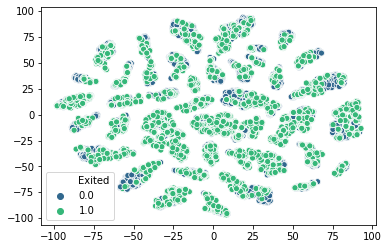

In [35]:
lda_resampled = resampling_df (churn_norm_LDA, 'Exited',SMOTETomek())

In [36]:
lda_resampled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1,Exited
0,0.620,0.067568,0.6,0.661904,0.333333,0.0,0.0,0.452459,1.0,1.0,0.0,1.0,0.344164,0.0
1,0.554,0.256757,0.7,0.587336,0.000000,1.0,1.0,0.665165,1.0,1.0,0.0,1.0,0.508549,0.0
2,0.522,0.472973,0.7,0.000000,0.333333,0.0,1.0,0.782494,1.0,0.0,0.0,0.0,0.494905,1.0
3,0.672,0.391892,0.5,0.681296,0.000000,1.0,0.0,0.865924,1.0,1.0,0.0,1.0,2.311285,1.0
4,1.000,0.175676,0.6,0.526097,0.333333,1.0,1.0,0.893765,0.0,0.0,0.0,1.0,-1.591473,0.0


In [37]:
# # Dimensions
print(f'Original dataset rows: {len(churn_norm_LDA)}')
print(f'Resampled dataset rows: {len(lda_resampled)}')

Original dataset rows: 10000
Resampled dataset rows: 14074


In [38]:
# Variables
X_lda_resampled = lda_resampled.drop(['Exited'],axis=1)
# Target
y_lda_resampled = pd.DataFrame(lda_resampled['Exited'])

#### Train_Test (90/10)

In [39]:
X_tr_lda_resampled, X_te_lda_resampled, y_tr_lda_resampled, y_te_lda_resampled = train_test(X=X_lda_resampled, y=y_lda_resampled, test_size=0.1, stratify=y_lda_resampled)

### 5_XGBoost

In [40]:
# Parameter XGBClassifier
parameters = {'booster': ['gbtree','dart'],
              'gamma': np.linspace(0,1,5),
              'objective': ['binary:hinge']}

In [41]:
gs_XGB = grid_search(parameters, XGBClassifier(**parameters), X_tr_lda_resampled, y_tr_lda_resampled, 'XGBoost')

----------------------------------XGBoost-------------------------------------
Best score: 89.839%
Best Parameters:
{'booster': 'gbtree', 'gamma': 0.0, 'objective': 'binary:hinge'}


#### Model

In [42]:
xgb = model_evaluation(X_tr_lda_resampled, X_te_lda_resampled, 
                       y_tr_lda_resampled.values.ravel(), y_te_lda_resampled.values.ravel(), 
                       model=XGBClassifier(**gs_XGB))

#### Classification Report

In [43]:
print(f'Classification Report')
print(f'{xgb[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       704
         1.0       0.91      0.91      0.91       704

    accuracy                           0.91      1408
   macro avg       0.91      0.91      0.91      1408
weighted avg       0.91      0.91      0.91      1408



#### Confusion Matrix

Confusion Matrix
[[638  66]
 [ 64 640]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

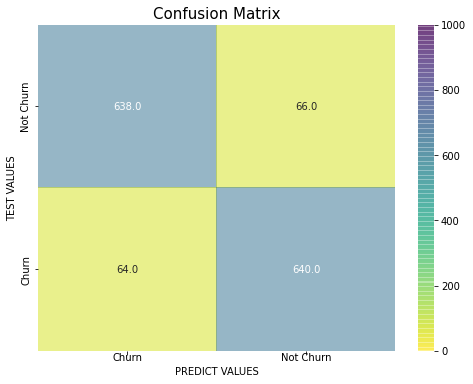

---------------------------------------------
T0 (True Not Churn): 638 (90.62%)
F0 (False Not Churn): 64 (9.09%)
T1 (True Churn): 640 (90.91%)
F1 (False Churn): 66 (9.38%)


In [44]:
recap_xgb = confusion_matrix_results(xgb)

#### Conclusions

**XGBoost** gives **better performance** than SVC and MLPC and using it in stacking will help improve ensemble model performance even more.

### 6_Stacking

We need to define two things in order to build our **stacking model**: 

 - the **L-learners** we want to fit;
 - the **meta-model** that combines them.

#### L-learners

 - **Neural Network** (Multilayer Perceptron)
 - **C-Support Vector Classification**
 - **XGBoost**  (Extra Gradient boosting) 

In [45]:
# L-learners
names_lv0 = ['svm','mplc','boost']
models_lv0 = [SVC(**params_SVC), MLPClassifier(**params_MLPC), XGBClassifier(**gs_XGB)]

#### Meta-models

We create two ensemble models using two different meta-models:
    
 - **Neural Network (Multilayer Perceptron)**
 - **C-Support Vector Classification**

### 6.1_Meta-Model:MLPC

- L-learners:  **SVC** + **MLPC** + **XGB**

- meta-model: **MLPC**

In [46]:
# Meta model MLPC
MLPC_lv1 = MLPClassifier(**params_MLPC)

In [49]:
stacking_MLPC = stacking_combine(names_lv0,models_lv0, MLPC_lv1)

#### Model

In [50]:
MLPC_stacking = model_evaluation(X_tr_lda_resampled, X_te_lda_resampled, 
                       y_tr_lda_resampled.values.ravel(), y_te_lda_resampled.values.ravel(), 
                       model=stacking_MLPC)

#### Accuracy

In [51]:
print(f'TRAIN accuracy: {MLPC_stacking[0]} %')
print(f'TEST accuracy_norm: {MLPC_stacking[1]} %')

TRAIN accuracy: 95.35 %
TEST accuracy_norm: 90.7 %


#### Classification Report

In [52]:
print(f'Classification Report')
print(f'{MLPC_stacking[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91       704
         1.0       0.89      0.92      0.91       704

    accuracy                           0.91      1408
   macro avg       0.91      0.91      0.91      1408
weighted avg       0.91      0.91      0.91      1408



#### Correlation Matrix

Confusion Matrix
[[627  77]
 [ 54 650]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

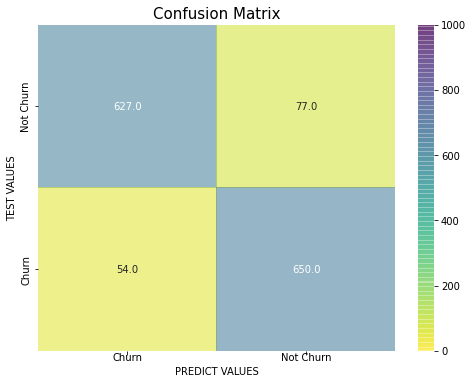

---------------------------------------------
T0 (True Not Churn): 627 (89.06%)
F0 (False Not Churn): 54 (7.67%)
T1 (True Churn): 650 (92.33%)
F1 (False Churn): 77 (10.94%)


In [53]:
recap_cm = confusion_matrix_results(MLPC_stacking)

### 6.2_Meta-Model:SVC

- L-learners:  **SVC** + **MLPC** + **XGB**

- meta-model: **SVC**

In [54]:
# Meta model SVC
SVC_lv1 = SVC(**params_SVC)

In [55]:
stacking_SVC = stacking_combine(names_lv0,models_lv0, SVC_lv1)

#### Model

In [56]:
SVC_stacking = model_evaluation(X_tr_lda_resampled, X_te_lda_resampled, 
                       y_tr_lda_resampled.values.ravel(), y_te_lda_resampled.values.ravel(), 
                       model=stacking_SVC)

#### Accuracy

In [57]:
print(f'TRAIN accuracy: {SVC_stacking[0]} %')
print(f'TEST accuracy_norm: {SVC_stacking[1]} %')

TRAIN accuracy: 95.31 %
TEST accuracy_norm: 91.19 %


#### Classification Report

In [58]:
print(f'Classification Report')
print(f'{SVC_stacking[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       704
         1.0       0.91      0.92      0.91       704

    accuracy                           0.91      1408
   macro avg       0.91      0.91      0.91      1408
weighted avg       0.91      0.91      0.91      1408



#### Correlation Matrix

Confusion Matrix
[[639  65]
 [ 59 645]]
---------------------------------------------


<Figure size 432x288 with 0 Axes>

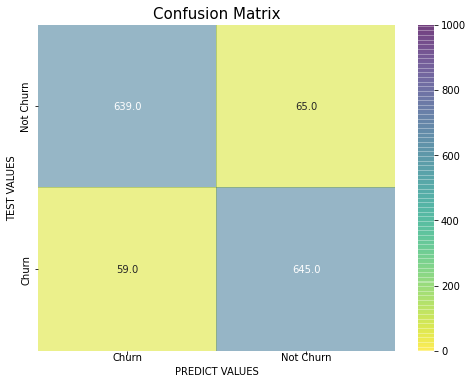

---------------------------------------------
T0 (True Not Churn): 639 (90.77%)
F0 (False Not Churn): 59 (8.38%)
T1 (True Churn): 645 (91.62%)
F1 (False Churn): 65 (9.23%)


In [59]:
recap_cm = confusion_matrix_results(SVC_stacking)

### 6.3_Conclusions

Both these **ensemble models improve the performance** of previous models (MLPC-SVC), giving a **better prediction for customers who have left the bank** than those who have not.

The **best model** analyzed so far is: **Stacking with Meta-Model SVC**.

### 7_Recap_Results

We select the **best recall** and **f1-score** values for **exited clients** in the analyzed models and make a **visual comparison**.

**Models**

- Logistic Regression (LR)
- Random Forest (RF)
- C-Support Vector Classification (SVC)
- Neural Network (Multilayer Perceptron) (MLP)
- XGBoost (XGB)
- StackingSVC (StSVC)

In [21]:
# Models
X = ['LR','RF','SVC','MLP','XGB','StSVC']
# Recall %
Y_recall = [17,54,89,73,91,91]
# F1-score %
Y_f1score = [26,56,86,76,91,92]

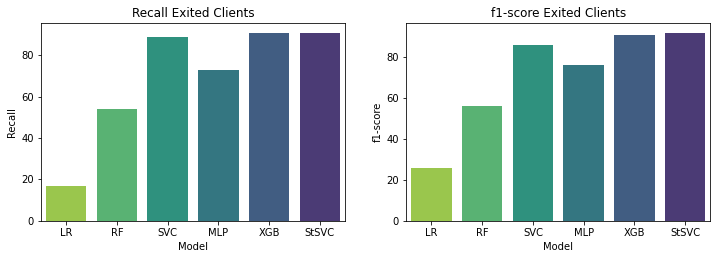

In [28]:
plt.figure(figsize=(12,8))



plt.subplot(2,2,1)
sns.barplot(x=X,y=Y_recall, palette='viridis_r')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Exited Clients')

plt.subplot(2,2,2)
sns.barplot(x=X,y=Y_f1score, palette='viridis_r')
plt.xlabel('Model')
plt.ylabel('f1-score')
plt.title('f1-score Exited Clients');

The **worst model** for the prediction of **Churn Clients** is the **Logistic Fgression** (LR); the **better** one is the **Stacking model** with Meta-Model SVC (with results similar to the XGBoost (XGB)).